## Libraries

In [1]:
# Main libraries installation
!pip install pystac_client > nul

In [2]:
pip install odc-stac > nul

In [3]:
# Import necessary libraries
from pystac_client import Client  # Import the Client class from pystac_client library
from odc.stac import load  # Import the load function from the odc.stac module
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library

## Data Ingestion

In [4]:
# Connect to the STAC API endpoint
client = Client.open("http://earth-search.aws.element84.com/v1")

# Specify the desired collection
collection = "sentinel-2-l2a"

# Define a bounding box for the search area [min_lon, min_lat, max_lon, max_lat]
ant_bbox = [30.444946, 36.804887, 30.933837, 37.059561]

# Perform a search using the specified parameters
search = client.search(collections=[collection], bbox=ant_bbox, datetime="2023-12")

## Data exploring

In [5]:
# Load data using the odc.stac load function based on the search results
data = load(search.items(), bbox=ant_bbox, groupby="solar_day", chunks={})

# Select a single time slice (e.g., the first time step) from the loaded data
data_slice = data.isel(time=0)

## Data Visualization

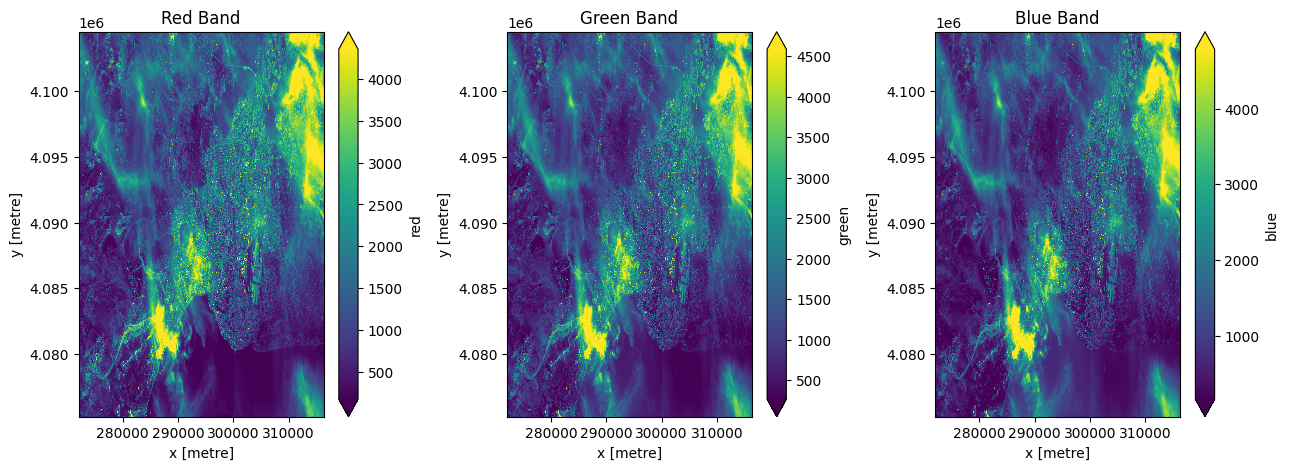

In [7]:
# Plotting the "red", "green", and "blue" bands individually
plt.figure(figsize=(15, 5))  # Adjusted the total size of the figure

# Adjusting the space between subplots
plt.subplots_adjust(wspace=0.4)  # Change the value according to your preference

# Subplot 1
plt.subplot(131)
data_slice["red"].plot.imshow(robust=True)
plt.title("Red Band")

# Subplot 2
plt.subplot(132)
data_slice["green"].plot.imshow(robust=True)
plt.title("Green Band")

# Subplot 3
plt.subplot(133)
data_slice["blue"].plot.imshow(robust=True)
plt.title("Blue Band")

plt.show()